## Verification Scripts
These Scripts are essentially for Checking and Verifying the Verilog Code
1. The first script is used to run through the process of the verilog module (using the make tools)
2. The second script goes through every line of output and compares it to the original audio_bitstream provided to make sure the verilog code is working

Reading the input image...
Input Image:


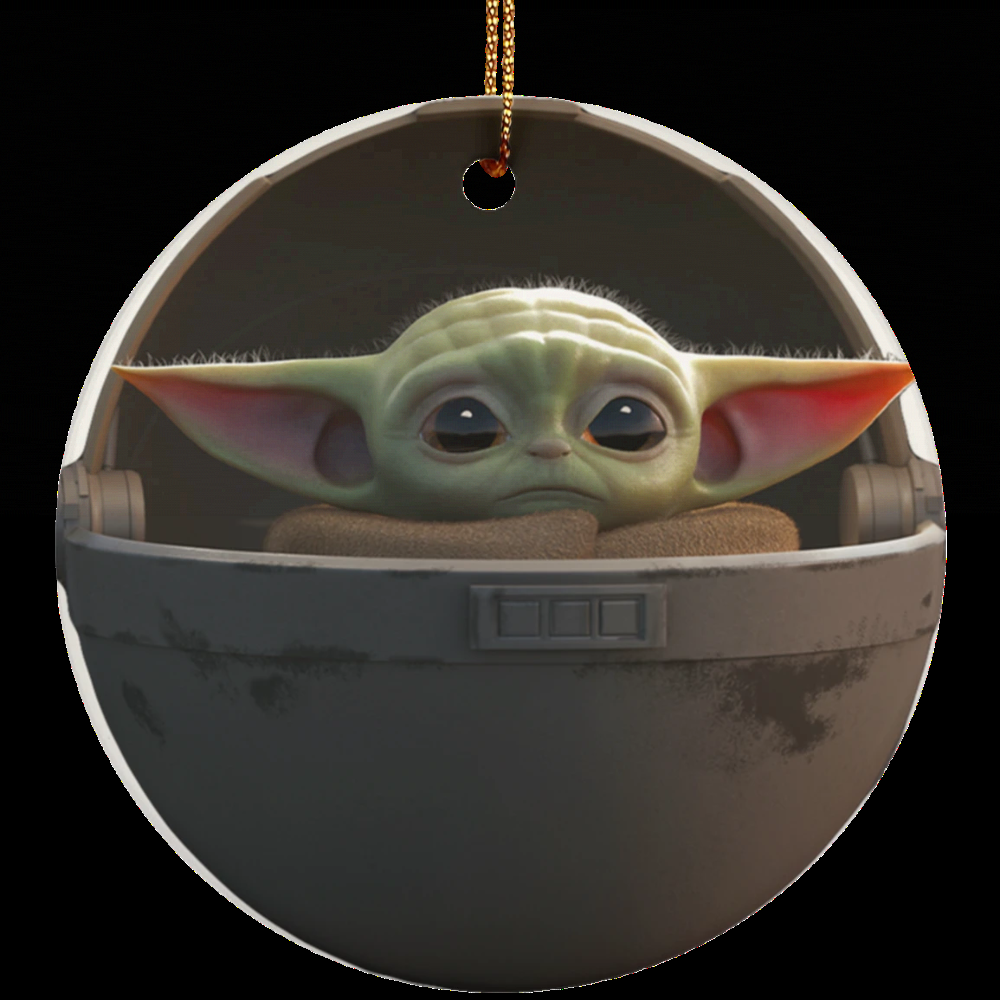

Compiling and running the Verilog code...
Playing Decoded Audio:


CompletedProcess(args=['make', 'clean'], returncode=2)

In [1]:
import subprocess
from scipy.io.wavfile import write
import numpy as np
from PIL import Image
from IPython.display import display
from IPython.display import Audio

samplerate = 44100

# --------------------------------------------------------------------------------------------
# READ THE INPUT IMAGE

print("Reading the input image...")
# Read the bitstream from the file
with open("encoded_bitstream.txt", "r") as file:
    bitstream = file.read().replace("\n", "")

# Convert the bitstream back to image data
image_data = []
for i in range(0, len(bitstream), 24):
    pixel = bitstream[i:i+24]
    r = int(pixel[0:8], 2)
    g = int(pixel[8:16], 2)
    b = int(pixel[16:24], 2)
    image_data.append((r, g, b))

# Convert the list to a numpy array
image_data = np.array(image_data, dtype=np.uint8)

# Reshape the array to match the original image size
image_data = image_data.reshape((1000, 1000, 3))

# Create an image from the array
image = Image.fromarray(image_data)

# Display the image
print("Input Image:")
display(image)

# --------------------------------------------------------------------------------------------
# RUN THE VERILOG CODE TO PROCESS THE IMAGE

# compile and run the verilog code
print("Compiling and running the Verilog code...")
subprocess.run("make", stdout=subprocess.DEVNULL, stderr=subprocess.STDOUT)

# --------------------------------------------------------------------------------------------
# READ THE OUTPUT AUDIO FILE

# Read the bitstream from the file
with open("decoded_bitstream.txt", "r") as file:
    bitstream = file.read().replace("\n", "")

# Convert the bitstream back to audio data
audio_data = []
for i in range(0, len(bitstream), 16):
    sample = bitstream[i:i+16]
    audio_data.append(int(sample, 2) - 2**15)  # Subtract 2^15 to shift samples back down

# Convert the list to a numpy array
audio_data = np.array(audio_data, dtype=np.int16)

# Write the audio data to a WAV file
write("reconstructed.wav", samplerate, audio_data)

subprocess.run(["make", "clean"], stdout=subprocess.DEVNULL, stderr=subprocess.STDOUT)

# play the audio
print("Playing Decoded Audio:")
Audio("reconstructed.wav")
# --------------------------------------------------------------------------------------------

# Remove the executable code
subprocess.run(["make", "clean"], stdout=subprocess.DEVNULL, stderr=subprocess.STDOUT)

In [2]:
# VERIFICATION CODE

# check every line of decoded_bitstream.txt and compare it to audio_bistream.txt, displaying the first differences
with open('decoded_bitstream.txt', 'r') as f:
    decoded = f.readlines()
with open('audio_bitstream.txt', 'r') as f:
    audio = f.readlines()
for i in range(len(decoded)):
    if decoded[i] != audio[i]:
        print(f"First difference at line {i+1}:\n{decoded[i]}{audio[i]}")
        break
else:
    print("No differences found")

No differences found
